In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
mostrecentdate = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(mostrecentdate.date)

2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# 2017-08-23
# Calculate the date one year from the last date in data set.
oneyearago = dt.date(2017,8,23) - dt.timedelta(days=365)
oneyearago

datetime.date(2016, 8, 23)

In [80]:
# Perform a query to retrieve the data and precipitation scores
lasttwelvemonths = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneyearago).order_by(Measurement.date).all()
# lasttwelvemonths # This is a list of tuples

In [31]:
# Save the query results as a Pandas DataFrame and set the index to the date column
lasttwelvemonths_df = pd.DataFrame(lasttwelvemonths, columns=['date', 'precipitation'])
lasttwelvemonths_df.set_index("date", inplace=True,)
lasttwelvemonths_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [41]:
# Sort the dataframe by date
lasttwelvemonths_df = lasttwelvemonths_df.sort_index(ascending = True)
lasttwelvemonths_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [42]:
# Use Pandas Plotting with Matplotlib to plot the data # last 12 months of precipitation data 

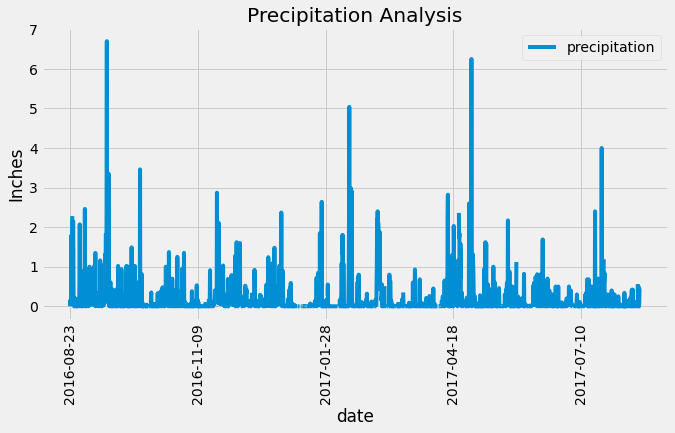

In [43]:
lasttwelvemonths_df.plot(title="Precipitation Analysis", ylabel="Inches", rot=90, figsize=(10,5))
plt.legend(loc='upper right')
plt.savefig("Images/precipitation.png")
plt.show()

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lasttwelvemonths_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
totalstations = session.query(Measurement).group_by(Measurement.station).count()
totalstations

9

In [51]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activestations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactivelowesttemp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).first()
mostactivelowesttemp

(54.0)

In [66]:
mostactivehighesttemp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs.desc()).first()
mostactivehighesttemp

(85.0)

In [72]:
mostactiveaveragetemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
mostactiveaveragetemp

[(71.66378066378067)]

In [ ]:
# # Alternative solution
# sel = [func.min(Measurement.tobs), 
#        func.max(Measurement.tobs), 
#        func.avg(Measurement.tobs)]

# min_max_avg_temp = session.query(*sel).filter(Measurement.station == "USC00519281").all()
# min_max_avg_temp

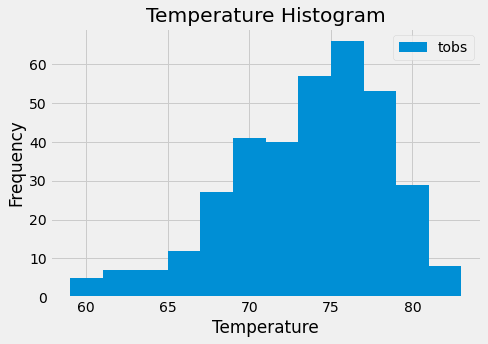

In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lasttwelvemonths_mostactive = session.query(Measurement.tobs).\
    filter(Measurement.date >= oneyearago).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()
# lasttwelvemonths_mostactive # It is a list of tuples

lasttwelvemonths_mostactive_df = pd.DataFrame(lasttwelvemonths_mostactive, columns=['tobs'])
lasttwelvemonths_mostactive_df
lasttwelvemonths_mostactive_df.plot.hist(bins=12, title="Temperature Histogram", figsize=(7,5))
plt.xlabel("Temperature")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("Images/Temperature Histogram.png")
plt.show()

# Close session

In [78]:
# Close Session
session.close()